# **Laboratorijska vježba 5**: Zadaci za samostalni rad

## **Predviđanje prodaje iz troškova oglasa**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži informacije o oglasima u kojima se prodaju određeni proizvodi, a objavljuju se na medijima poput TV-a, radija i novina. Skup podataka sadrži sljedeće stupce:

* TV - cijena za oglašavanje na TV-u za jedan proizvod na određenom tržištu (u tisućama dolara).
* Radio - cijena za oglašavanje na radiju za isti proizvod.
* Newspaper - cijena za oglašavanje u novinama za isti proizvod.
* Sales - prodaja jednog proizvoda na određenom tržištu (u tisućama jedinica).



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error



In [ ]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


## **Zadatak 1: Linearna regresija: predviđanje prodaje iz troškova oglasa**

Podijelite skup podataka na podskupove za trening i test. Definirajte model linearne regresije pomoću svih značajki, bez izvođenja bilo kakvih transformacija nad značajkama. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

feature_cols = data.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression().fit(X_train, y_train)

y_train_predicted = model.predict(X_train)
print ('MSE na treningu: ', mean_squared_error(y_train, y_train_predicted))

y_test_predicted = model.predict(X_test)
print('MSE na testu:', mean_squared_error(y_test, y_test_predicted))

MSE na treningu:  2.4793551789057866
MSE na testu: 3.79679723671522


Ispišite jednadžbu modela koristeći izračunate koeficijente.

In [ ]:
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model.coef_[f], feature_cols[f]))
print(model.intercept_)

0.04405928095746522 * TV + 
0.19928749689893954 * radio + 
0.006882452222275487 * newspaper + 
2.7089490925159065


Nacrtajte dijagram raspršenosti između stvarnih i predviđenih vrijednosti izlazne varijable za podskupove za trening i test.

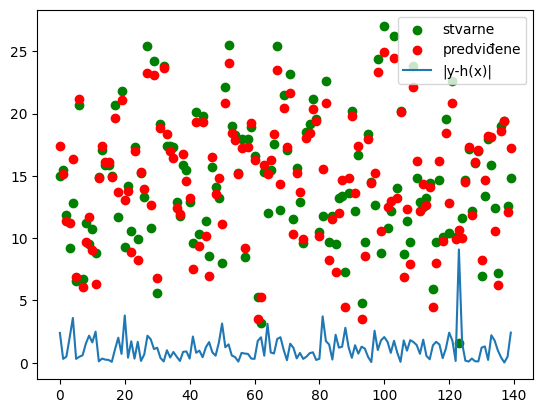

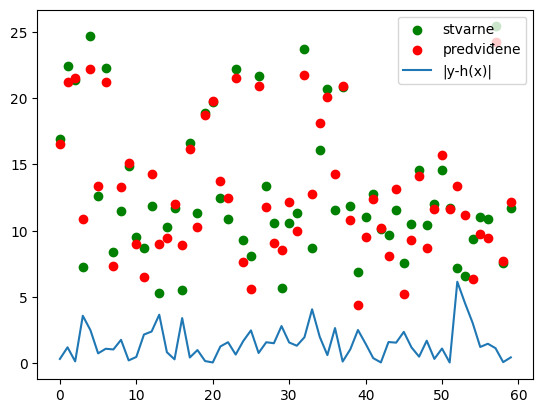

In [ ]:
X_train_tr=np.arange(0,len(X_train),1)
diff = np.abs(y_train - y_train_predicted)
plt.scatter(X_train_tr, y_train, c='g', label='stvarne')
plt.scatter(X_train_tr, y_train_predicted, c='r', label='predviđene')
plt.plot(X_train_tr, diff, label='|y-h(x)|')
plt.legend()
plt.show()


X_test_tr=np.arange(0, len(X_test),1)
diff = np.abs(y_test - y_test_predicted)
plt.scatter(X_test_tr, y_test, c='g', label='stvarne')
plt.scatter(X_test_tr, y_test_predicted, c='r', label='predviđene')
plt.plot(X_test_tr, diff, label='|y-h(x)|')
plt.legend()
plt.show()

## **Zadatak 2: Nelinearna regresija: predviđanje prodaje iz troškova oglasa**

Definirajte model nelinearne (polinomijalne) regresije sa stupnjem polinoma 2, 3, 5 i 10 bez uključivanja interakcijskih članova. Koristite klasu PolynomialFeatures iz modula preprocessing iz biblioteke scikit-learn. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

stupnjevi = [2, 3, 5, 10]
train=[]
test=[]

for stupanj in stupnjevi:
  poly = PolynomialFeatures(degree=stupanj, include_bias=False)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  model = LinearRegression().fit(X_train_poly, y_train)

  y_train_predicted = model.predict(X_train_poly)
  train_mse = mean_squared_error(y_train, y_train_predicted)
  train.append(train_mse)

  y_test_predicted = model.predict(X_test_poly)
  test_mse = mean_squared_error(y_test, y_test_predicted)
  test.append(test_mse)

  print("Stupanj ", stupanj)
  print("MSE trening: ", train_mse)
  print("MSE test: ", test_mse)
  print()

Stupanj  2
MSE trening:  0.3541097754193407
MSE test:  0.52319449490555

Stupanj  3
MSE trening:  0.21984452631177456
MSE test:  0.29077449152735363

Stupanj  5
MSE trening:  0.059449198112764494
MSE test:  35.36382965412483

Stupanj  10
MSE trening:  0.02936025392931409
MSE test:  149012020595.70538



Iscrtajte izračunate vrijednosti MSE (na treningu i testu) u ovisnosti o složenosti modela. Koristite linijski dijagram. 

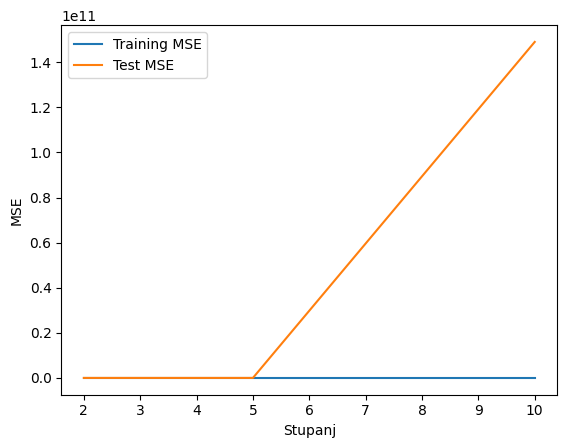

In [ ]:
plt.plot(stupnjevi, train, label='Training MSE')
plt.plot(stupnjevi, test, label='Test MSE')
plt.xlabel('Stupanj')
plt.ylabel('MSE')
plt.legend()
plt.show()

Ovaj put uključite interakcijske članove te ponovite treniranje i računanje mjere MSE.

Stupanj  2
MSE trening:  0.35410977541934024
MSE test:  0.5231944949055658

Stupanj  3
MSE trening:  0.21984452631177434
MSE test:  0.29077449153131163

Stupanj  5
MSE trening:  0.14980929022223635
MSE test:  46.96618991927361

Stupanj  10
MSE trening:  0.02483210520179272
MSE test:  253620947145.9207



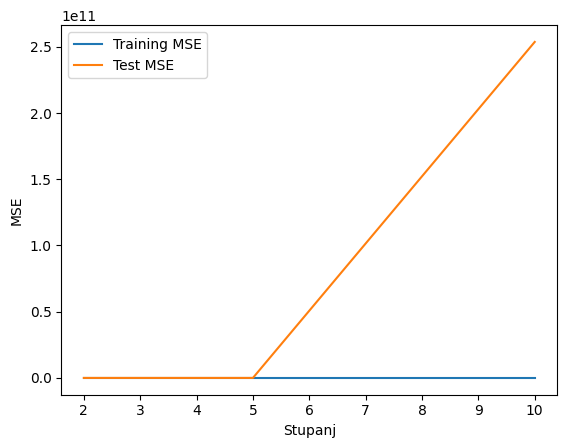

In [ ]:
train_ic=[]
test_ic=[]

for stupanj in stupnjevi:
  poly = PolynomialFeatures(degree=stupanj)
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.transform(X_test)

  model = LinearRegression().fit(X_train_poly, y_train)

  y_train_predicted = model.predict(X_train_poly)
  train_mse = mean_squared_error(y_train, y_train_predicted)
  train_ic.append(train_mse)

  y_test_predicted = model.predict(X_test_poly)
  test_mse = mean_squared_error(y_test, y_test_predicted)
  test_ic.append(test_mse)

  print("Stupanj ", stupanj)
  print("MSE trening: ", train_mse)
  print("MSE test: ", test_mse)
  print()


plt.plot(stupnjevi, train_ic, label='Training MSE')
plt.plot(stupnjevi, test_ic, label='Test MSE')
plt.xlabel('Stupanj')
plt.ylabel('MSE')
plt.legend()
plt.show()

Komentirajte dobivene rezultate. Koji model ima najbolje performanse na podskupu za trening, a koji na testu? Je li za ovaj problem prikladnija polinomijalna regresija od linearne regresije? Imaju li utjecaj interakcijski članovi na performanse modela?

In [ ]:
# Uspoređujući rezultate sa i bez intekacijskih članova, uočavamo da bolje performanse imaju modeli bez interakcijskih članova, a najbolji su stupanj 3 za test i stupanj 10 za trening.

# Prikladija je polinomijalna regresija jer je vrijednost MSE znatno manja kod polinomijalne.


## **Zadatak 3: Preslikavanje u prostor značajki**

Umjesto uvođenja novih (nelinearnih) značajki u model, pokušajte transformirati postojeće značajke. Za početak, za svaku značajku u skupu podataka (TV, Radio, Newspaper), vizualizirajte njezinu vezu s izlaznom varijablom (Sales) pomoću dijagrama raspršenosti. 

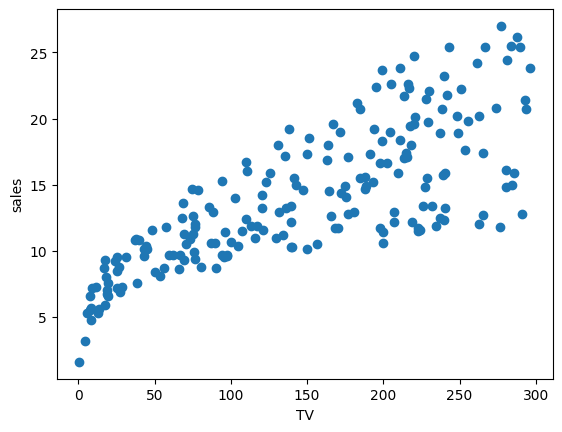

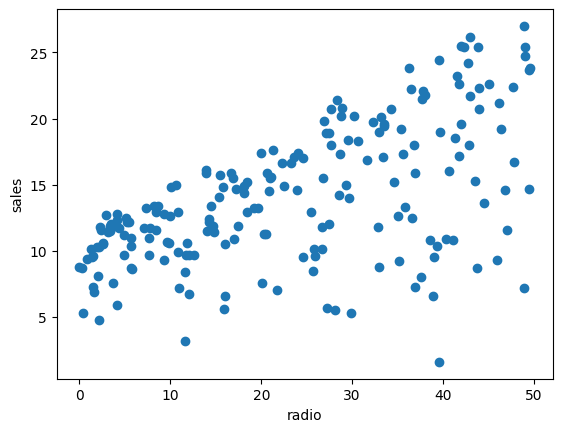

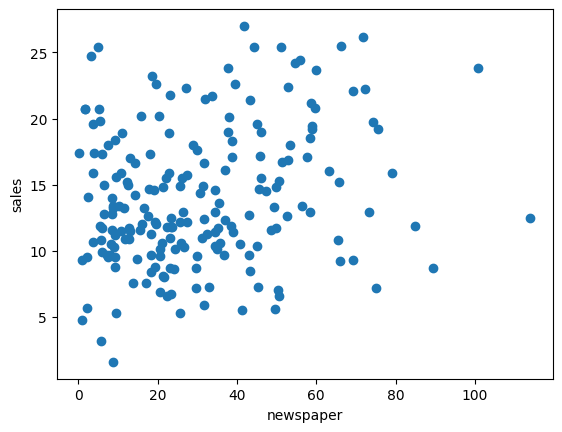

In [ ]:
plt.scatter(data['TV'], data['sales'])
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

plt.scatter(data['radio'], data['sales'])
plt.xlabel('radio')
plt.ylabel('sales')
plt.show()


plt.scatter(data['newspaper'], data['sales'])
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.show()

Na temelju ovih dijagrama, pokušajte zaključiti kakva je veza svake značajke i izlazne varijable. Pokušajte isprobati neke transformacije nad postojećim značajkama za koje mislite da će njihovu vezu nad izlaznom varijablom svesti u linearan oblik (primjerice, potenciranje, korjenovanje, logaritmiranje, ...).

In [ ]:
x=data['TV']**(1/2)
plt.scatter(x, data['sales'])
plt.xlabel('TV')
plt.ylabel('sales')
plt.show()

x=data['radio']**(1/2)
plt.scatter(x, data['sales'])
plt.xlabel('radio')
plt.ylabel('sales')
plt.show()




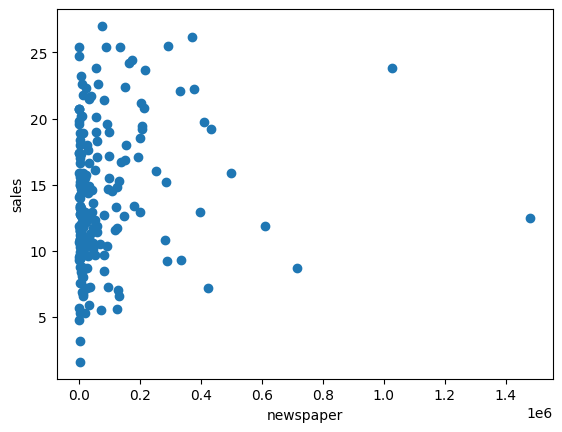

In [ ]:
x=data['newspaper']**(3)
plt.scatter(x, data['sales'])
plt.xlabel('newspaper')
plt.ylabel('sales')
plt.show()

Ponovno vizualizirajte vezu između svake (sada transformirane) značajke i izlazne varijable te provjerite je li došlo do kakvih promjena. Istrenirajte model linearne regresije s takvim značajkama te ga istrenirajte na podskupu za trening. Izračunajte MSE na podskupovima za trening i test. 

In [ ]:
X_train['TV']=X_train['TV']**(1/2)
X_train['radio']=X_train['radio']**(1/2)
X_train['newspaper']=X_train['newspaper']**(3)

X_test['TV']=X_test['TV']**(1/2)
X_test['radio']=X_test['radio']**(1/2)
X_test['newspaper']=X_test['newspaper']**(3)

model_tv = LinearRegression().fit(X_train, y_train)

y_train_pr_tv = model_tv.predict(X_train)
print ('MSE na treningu: ', mean_squared_error(y_train, y_train_pr_tv))

y_test_pr_tv = model_tv.predict(X_test)
print('MSE na testu:', mean_squared_error(y_test, y_test_pr_tv))






MSE na treningu:  2.5036778980065035
MSE na testu: 2.7948082997504557


Jeste li uspjeli pronaći neku transformaciju koja poboljšava performanse modela linearne regresije? Prokomentirajte dobivene rezultate.

In [ ]:
# Svaka transformacija koju sam pokušala nije uspjela svesti izlaznu varijablu na linearnu.

## **Zadatak 4: Regularizacija**

Kako biste ublažili prenaučenost modela, isprobajte učinak reguralizacije. Testirajte učinak L1 (Lasso) i L2 (Ridge) regularizacije iz biblioteke scikit-learn za gore definirane linearne i nelinearne modele. Možete odabrati najbolji model linearne i najbolji model nelinearne regresije od gore testiranih. Isprobajte nekoliko vrijednosti za parametar $\lambda$. Izračunajte MSE za podskupove za trening i test.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

linearModel = LinearRegression().fit(X_train, y_train)
y_train_predicted = linearModel.predict(X_train)
print ('MSE na treningu: ', mean_squared_error(y_train, y_train_predicted))

y_test_predicted = linearModel.predict(X_test)
print('MSE na testu:', mean_squared_error(y_test, y_test_predicted))


MSE na treningu:  2.4793551789057866
MSE na testu: 3.79679723671522


In [ ]:
linearModel = Ridge().fit(X_train, y_train)
y_train_predicted = linearModel.predict(X_train)
print ('MSE na treningu: ', mean_squared_error(y_train, y_train_predicted))

y_test_predicted = linearModel.predict(X_test)
print('MSE na testu:', mean_squared_error(y_test, y_test_predicted))

MSE na treningu:  2.4793551895233197
MSE na testu: 3.796691873092173


In [ ]:
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 88.53562103898089
0.5 : 88.53561969524841
0.75 : 88.53561834859886
1.0 : 88.53561699903238
1.25 : 88.53561564654912
1.5 : 88.53561429114917
1.75 : 88.53561293283273
2.0 : 88.53561157159989


In [ ]:

# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 2)
ridgeModelChosen.fit(X_train, y_train)
 
# Evaluating the Ridge Regression model
y_train_predicted = ridgeModelChosen.predict(X_train)
print ('MSE na treningu: ', mean_squared_error(y_train, y_train_predicted))

y_test_predicted = ridgeModelChosen.predict(X_test)
print('MSE na testu:', mean_squared_error(y_test, y_test_predicted))

MSE na treningu:  2.479355221372518
MSE na testu: 3.7965865388937132


In [ ]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 88.57516076525665
0.5 : 88.60045194718055
0.75 : 88.61554767023374
1.0 : 88.61793585344758
1.25 : 88.61440489069084
1.5 : 88.60302457714243
1.75 : 88.58908927683744
2.0 : 88.57259898977586


In [ ]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 1, tol = 0.0925)
lassoModelChosen.fit(X_train, y_train)
 
# Evaluating the Lasso Regression model
y_train_predicted = lassoModelChosen.predict(X_train)
print ('MSE na treningu: ', mean_squared_error(y_train, y_train_predicted))

y_test_predicted = lassoModelChosen.predict(X_test)
print('MSE na testu:', mean_squared_error(y_test, y_test_predicted))

MSE na treningu:  2.484318666302587
MSE na testu: 3.6874481441505598


In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model = LinearRegression().fit(X_train_poly, y_train)
y_train_predicted = model.predict(X_train_poly)
train_mse = mean_squared_error(y_train, y_train_predicted)
train.append(train_mse)

y_test_predicted = model.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_predicted)
test.append(test_mse)


print("MSE trening: ", train_mse)
print("MSE test: ", test_mse)


MSE trening:  0.21984452631177456
MSE test:  0.29077449152735363


In [ ]:
cross_val_scores_ridge = []
 
# List to maintain the different values of alpha
alpha = []
 
# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train_poly, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 88.53562103898089
0.5 : 88.53561969524841
0.75 : 88.53561834859886
1.0 : 88.53561699903238
1.25 : 88.53561564654912
1.5 : 88.53561429114917
1.75 : 88.53561293283273
2.0 : 88.53561157159989


In [ ]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 0.25)
ridgeModelChosen.fit(X_train_poly, y_train)
 
# Evaluating the Ridge Regression model
y_train_predicted = ridgeModelChosen.predict(X_train_poly)
print ('MSE na treningu: ', mean_squared_error(y_train, y_train_predicted))

y_test_predicted = ridgeModelChosen.predict(X_test_poly)
print('MSE na testu:', mean_squared_error(y_test, y_test_predicted))

MSE na treningu:  0.2198445277313842
MSE na testu: 0.2907706086562542


In [ ]:
# List to maintain the cross-validation scores
cross_val_scores_lasso = []
 
# List to maintain the different values of Lambda
Lambda = []
 
# Loop to compute the cross-validation scores
for i in range(1, 9):
    lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925)
    lassoModel.fit(X_train_poly, y_train)
    scores = cross_val_score(lassoModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_lasso.append(avg_cross_val_score)
    Lambda.append(i * 0.25)
 
# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_lasso[i]))

0.25 : 88.57516076525665
0.5 : 88.60045194718055
0.75 : 88.61554767023374
1.0 : 88.61793585344758
1.25 : 88.61440489069084
1.5 : 88.60302457714243
1.75 : 88.58908927683744
2.0 : 88.57259898977586


In [ ]:
# Building and fitting the Lasso Regression Model
lassoModelChosen = Lasso(alpha = 1, tol = 0.0925)
lassoModelChosen.fit(X_train_poly, y_train)
 
# Evaluating the Lasso Regression model
y_train_predicted = lassoModelChosen.predict(X_train_poly)
print ('MSE na treningu: ', mean_squared_error(y_train, y_train_predicted))

y_test_predicted = lassoModelChosen.predict(X_test_poly)
print('MSE na testu:', mean_squared_error(y_test, y_test_predicted))

MSE na treningu:  1.0307538952611626
MSE na testu: 1.690586924819697


Prokomentirajte dobivene rezultate. Ima li uvođenje regularizacije učinak na performanse modela linearne i nelinearne regresije za promatrani problem?

In [ ]:
# za linearni model L1 regularizacija ima veći učinak od L2, dok za nelinearni model nema nekog utjecaja.

## **Zadatak 5: Drugi algoritmi za regresiju**

U biblioteci scikit-learn postoje brojni drugi algoritmi strojnog učenja koji se mogu koristiti za potrebe regresije. Evaluirajte učinkovitost tih algoritma na promatranom problemu. Trenirajte modele SVR, DecisionTreeRegressor i KNeighborsRegressor sa zadanim postavkama parametara. Usporedite njihove performanse na podskupu za test s performansama gore definiranih modela regresije. Uz mjeru MSE, za usporedbu koristite i mjere RMSE i MAE.

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

mse_svr=mean_squared_error(y_test, y_pred)
print("MSE", mse_svr )
print("RMSE", np.sqrt(mse_svr))
print("MAE", mean_absolute_error(y_test, y_pred))

MSE 4.329839036315111
RMSE 2.08082652720382
MAE 1.4817429625437224


In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

mse=mean_squared_error(y_test, y_pred_dt)
print("MSE", mse )
print("RMSE", np.sqrt(mse))
print("MAE", mean_absolute_error(y_test, y_pred_dt))


MSE 1.8718333333333337
RMSE 1.3681496019563555
MAE 1.0350000000000004


In [ ]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

mse=mean_squared_error(y_test, y_pred_knn)
print("MSE", mse )
print("RMSE", np.sqrt(mse))
print("MAE", mean_absolute_error(y_test, y_pred_knn))

MSE 2.523600000000001
RMSE 1.5885842753848476
MAE 1.178666666666667
